In [1]:
%matplotlib notebook
import math
import matplotlib.pyplot as plt
import numpy as np
import quaternion
import pandas
import sys

from algorithms import geometry
from pre_processing import gen_dataset
from utility import write_trajectory_to_ply
from scipy.ndimage.filters import gaussian_filter1d
nano_to_sec = 1e09

# configure the size of plot
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 12
fig_size[1] = 9

<IPython.core.display.Javascript object>


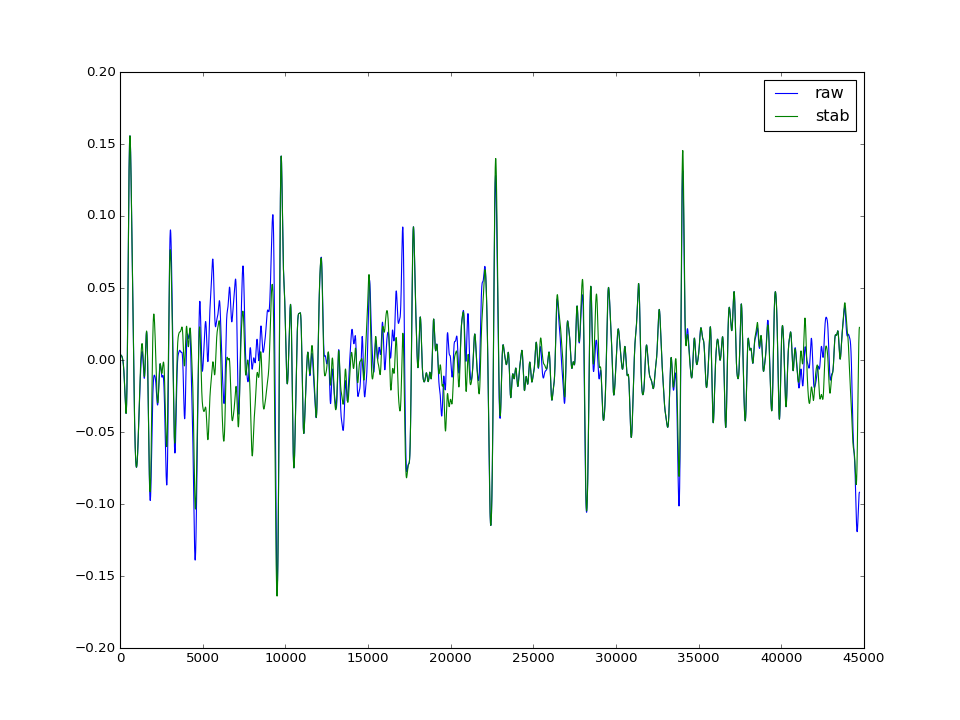

In [9]:
data_path = '../../data/magnet/campus1_0'

data_all = pandas.read_csv(data_path + '/processed/data.csv')

ts = data_all['time'].values
position = data_all[['pos_x', 'pos_y', 'pos_z']].values
orientation = data_all[['ori_w', 'ori_x', 'ori_y', 'ori_z']].values
linacce_stab = data_all[['linacce_stab_x', 'linacce_stab_y', 'linacce_stab_z']].values
linacce = data_all[['linacce_x', 'linacce_y', 'linacce_z']].values

sigma=100.0
linacce_stab = gaussian_filter1d(linacce_stab, sigma=sigma, axis=0)
linacce = gaussian_filter1d(linacce, sigma=sigma, axis=0)

plt.figure('linacce stab')
plt.plot(linacce[:, 1])
plt.plot(linacce_stab[:, 1])
plt.legend(['raw', 'stab'])